<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C6SC5_JesusAdrianAguilarPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo:

Construir un corpus utilizando las herramientas que has practicado a lo largo del módulo y realizar las siguientes actividades: calcular las frecuencias de longitudes de texto, frecuencias de palabras más comunes y extensión de vectores de stopwords.
Realizar las operaciones de procesamiento básico de textos: tokenizar, aplicar stemming, remover stopwords.
Crear gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.
Implementar y aplicar el análisis de sentimientos a los textos que se han recopilado en el corpus.

In [1]:
 import pandas as pd
 import numpy as np
 import regex as re
 import nltk
 import matplotlib.pyplot as plt
 %matplotlib inline
 from wordcloud import WordCloud
 from collections import Counter
 import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
Stocks1 = pd.read_csv('/content/stockerbot-export.csv')


In [5]:
Stocks1.head()

,id,text,timestamp,source,symbols,company_names,url,verified,Unnamed: 8
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,NaN
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True,NaN
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,NaN
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,NaN
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,NaN


In [6]:
sw_list = stopwords.words()
sw = set(sw_list)
#Preprocesar el texto
def preprocesar_texto(texto):

  # Tokenizar el texto
  tokens = word_tokenize(texto.lower())

  # Eliminar caracteres especiales y números
  tokens = [token for token in tokens if token.isalpha()]

  # Aplicar stemming
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  # Remover stopwords
  stop_words = set(stopwords.words('english'))
  stop_words.add("http")
  tokens = [token for token in tokens if token not in stop_words]

  return tokens

def cuenta_palabras_df(df, column='palabras', min_frecuencias=10):
   # crea un contador y cuenta todas las palabras
   contador = Counter()
   df[column].map(contador.update)

   #convertir el contador en un dataframe
   frecuencias_df = pd.DataFrame.from_dict(contador, orient='index', columns=['frecuencias'])
   frecuencias_df = frecuencias_df.query('frecuencias >= @min_frecuencias')

   frecuencias_df.index.name = 'palabra'
   frecuencias_df.sort_values('frecuencias', ascending=False)
   return frecuencias_df.sort_values('frecuencias', ascending=False)

   #Probabilidades paraa el analisis de sentimiento
def obtenProbabilidades(df: pd.DataFrame, sentimientos):
    negativos, neutros, positivos, outputs = [], [], [], []

    for probabilidad in sentimientos:
        negativos.append(probabilidad.probas['NEG'])
        neutros.append(probabilidad.probas['NEU'])
        positivos.append(probabilidad.probas['POS'])
        outputs.append(probabilidad.output)

    probabilidades = pd.DataFrame({'neg': negativos, 'neu': neutros, 'pos': positivos, 'output': outputs})
    probabilidades.index = df.index
    return pd.concat([df, probabilidades], axis=1)

   #Nube de palabras
def nube_palabras(corpus, color):
    wordcloud = WordCloud(
        background_color=color,
        stopwords=sw,
        max_words=100,
        max_font_size=45,
        scale=3,
        random_state=1,
    )
    return wordcloud.generate(str(corpus))

In [7]:
Stocks1['words'] = Stocks1.text.apply(preprocesar_texto)
Stocks1['freq_review'] = Stocks1.words.map(len)

Grafica de Frecuencia

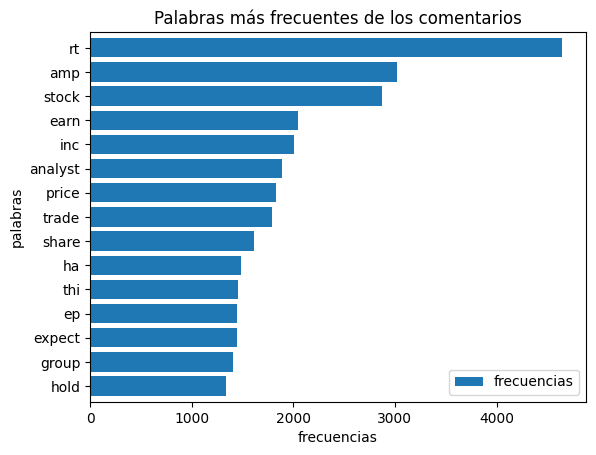

In [8]:
frecuencias_df= cuenta_palabras_df(Stocks1, 'words', 150)
ax = frecuencias_df.head(15).plot(kind='barh', width=0.80)
ax.invert_yaxis();
ax.set(xlabel='frecuencias', ylabel='palabras', title='Palabras más frecuentes de los comentarios');

[Text(0.5, 0, ''), Text(0, 0.5, ''), [], [], Text(0.5, 1.0, 'Frecuencia')]

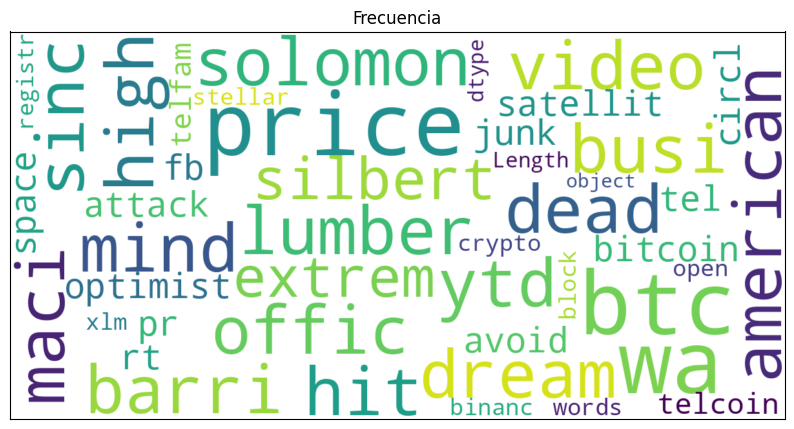

In [9]:
nube_palabras(Stocks1.words, 'white')

fig, (ax0) = plt.subplots(1,1, figsize=(10,8))

ax0.imshow(nube_palabras(Stocks1.words, 'white'), interpolation='bilinear')
ax0.set(xlabel=None, ylabel=None, xticks=[], yticks=[], title='Frecuencia')

In [10]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang='en')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [11]:
sample = Stocks1.sample(10000, random_state=100)

In [12]:
reviews = sample['text'].tolist()
sentimientos = analyzer.predict(reviews)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ing-jaguilarp (ing-jaguilarp-tecnologico-de-monterrey) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


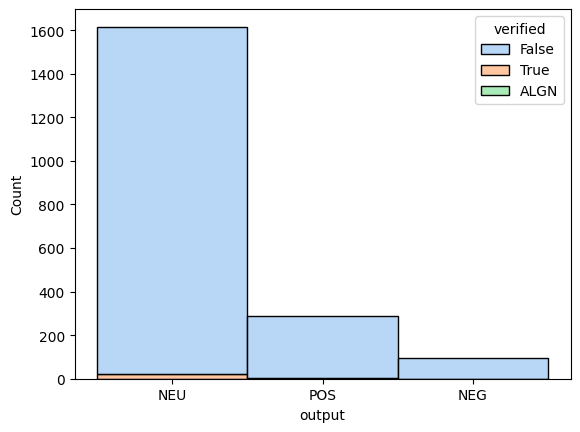

In [13]:
probs = obtenProbabilidades(sample, sentimientos)
sns.histplot(data=probs, hue='verified', x='output', palette="pastel", multiple="stack");

En el analisis de frecuencias podemos observar que rt y amp son las acciones con mas menciones.
En la nube de palabras se puede observar tambien que BTC tiene una frecuencia alta.
Se observa igualmente frecuencia alta en palabras como price y high lo que señala que el mercado es optimista.
Finalmente con el analisis de sentimiento se observa que el 70% aprox de comentarios son de sentimiento neutro, el 20% aprox es positivo y el 10% aprox es negativo.
Lo que indica que el mercado no tiene una direccion clara en cuanto el sentimiento de los tweets.